In [72]:
import numpy as np

In [73]:
class _LinearRegression():
    def __init__(self, alpha=0.01, max_iters=1000, min_weight_dist=1e-8, method="gradient descent"):
        self.alpha = alpha
        self.max_iters = max_iters
        self.min_weight_dist = min_weight_dist
        self.method = method
        self.params = None
        self.errors = []
        self.iters = 0
        
        
    def _mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    
    def _gradient_descent(self, X_train, y_train, n_samples, n_features):
        weight_dist = np.inf
        
        while self.iters < self.max_iters or self.min_weight_dist < weight_dist:
            params_old = self.params
            self.params -= (self.alpha/n_samples) * X_train.T @ (X_train @ self.params - y_train)
            weight_dist = np.linalg.norm(params_old - self.params)
            
            self.errors.append(self._mse(y_train, X_train @ self.params))
            self.iters += 1
            
    
    def _sgd(self, X_train, y_train, n_samples, n_features):
        weight_dist = np.inf
        np.random.seed(42)
        
        while self.iters < self.max_iters or self.min_weight_dist < weight_dist:
            ind = np.random.randint(n_samples)
            x = np.reshape(X_train[ind], (1, n_features))
            
            params_old = self.params
            self.params -= (self.alpha/n_samples) * x.T @ (x @ self.params - y_train[ind])    
            weight_dist = np.linalg.norm(params_old - self.params)
            
            self.errors.append(self._mse(y_train, X_train @ self.params))
            self.iters += 1
    
    
    def _fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train = y_train[:, np.newaxis]
        self.params = np.zeros((n_features, 1))
        
        if self.method == "gradient descent":
            return self._gradient_descent(X_train, y_train, n_samples, n_features)
        elif self.method == "sgd":
            return self._sgd(X_train, y_train, n_samples, n_features)
        else: raise ValueError(f"No such method: '{self.method}'")
        

    def _predict(self, X_test):
        return X_test @ self.params

In [74]:
from sklearn.datasets import load_boston

boston = load_boston()
data = boston.data
target = boston.target

data.shape       

(506, 13)

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

print(f'Train data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Train data shape: (354, 13)
Test data shape: (152, 13)


In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
X_train_transformed_ones = np.hstack((np.ones((X_train.shape[0], 1)), X_train_transformed))
X_test_transformed_ones = np.hstack((np.ones((X_test.shape[0], 1)), X_test_transformed))

X_train_transformed_ones.shape

(354, 14)

In [79]:
%%time

_lr_custom = _LinearRegression()
_lr_custom._fit(X_train_transformed_ones, y_train)
y_pred_custom = _lr_custom._predict(X_test_transformed_ones)
mse_custom = mean_squared_error(y_test, y_pred_custom)

print(f"Mean squared error for custom model: {mse_custom}")

Mean squared error for custom model: 46.20980734932699
Wall time: 115 ms


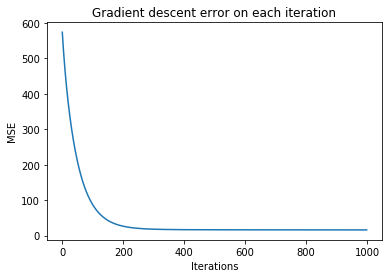

In [80]:
import matplotlib.pyplot as plt

iterations = range(_lr_custom.iters)
errors = _lr_custom.errors

plt.plot(iterations, errors)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Gradient descent error on each iteration");

In [81]:
%%time

from sklearn.linear_model import LinearRegression

lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train_transformed, y_train)
y_pred_sklearn = lr_sklearn.predict(X_test_transformed)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

print(f"Mean squared error for sklearn model: {mse_sklearn}")

Mean squared error for sklearn model: 45.61207517603871
Wall time: 3.27 ms


### Testing SGD

In [82]:
%%time

_sgd_custom = _LinearRegression(method="sgd", max_iters=1e6)
_sgd_custom._fit(X_train_transformed_ones, y_train)
y_pred_custom = _sgd_custom._predict(X_test_transformed_ones)
mse_custom = mean_squared_error(y_test, y_pred_custom)

print(f"MSE for custom SGD: {mse_custom}")

MSE for custom SGD: 45.85507823108395
Wall time: 1min 36s


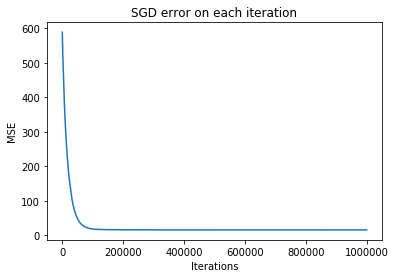

In [83]:
iterations = range(_sgd_custom.iters)
errors = _sgd_custom.errors

plt.plot(iterations, errors)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("SGD error on each iteration");

In [84]:
%%time

from sklearn.linear_model import SGDRegressor

sgd_sklearn = SGDRegressor()
sgd_sklearn.fit(X_train_transformed, y_train)
y_pred_sklearn = sgd_sklearn.predict(X_test_transformed)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

print(f"Mean squared error for sklearn SGD: {mse_sklearn}")

Mean squared error for sklearn SGD: 46.663412546428354
Wall time: 8.02 ms
